In [1]:
! pip install scikit-learn==1.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# filter warnings
warnings.filterwarnings('ignore')

In [4]:
# load data
df = pd.read_csv('/content/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1.0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0.0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1.0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1.0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1.0


In [5]:
# shape
df.shape

(26257, 14)

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,26257.000000,2.625700e+04,26257.000000,26257.000000,26257.000000,26256.000000,26256.000000,26256.000000,26256.000000
mean,25.666184,7.392621e+04,3.522794,9294.561450,10.996533,0.141648,4.446793,630.152994,0.222882
std,3.745193,4.542480e+04,3.811009,6110.857069,3.066231,0.086954,2.415021,49.788771,0.416188
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,421.000000,0.000000
25%,23.000000,4.596700e+04,0.000000,5000.000000,8.490000,0.080000,3.000000,600.000000,0.000000
50%,25.000000,6.564700e+04,3.000000,8000.000000,11.010000,0.120000,4.000000,637.000000,0.000000
75%,28.000000,9.069200e+04,6.000000,12000.000000,13.110000,0.190000,6.000000,667.000000,0.000000
max,144.000000,1.440746e+06,125.000000,35000.000000,20.000000,0.660000,10.000000,807.000000,1.000000


In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26257 entries, 0 to 26256
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      26257 non-null  float64
 1   person_gender                   26257 non-null  object 
 2   person_education                26257 non-null  object 
 3   person_income                   26257 non-null  float64
 4   person_emp_exp                  26257 non-null  int64  
 5   person_home_ownership           26257 non-null  object 
 6   loan_amnt                       26257 non-null  float64
 7   loan_intent                     26257 non-null  object 
 8   loan_int_rate                   26257 non-null  float64
 9   loan_percent_income             26256 non-null  float64
 10  cb_person_cred_hist_length      26256 non-null  float64
 11  credit_score                    26256 non-null  float64
 12  previous_loan_defaults_on_file  

In [9]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,1


In [10]:
# handle missing value
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['loan_percent_income'] = df['loan_percent_income'].fillna(df['loan_percent_income'].mean())
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].fillna(df['cb_person_cred_hist_length'].mean())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['loan_status'] = df['loan_status'].fillna(df['loan_status'].mean())

In [11]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [12]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].fillna(df['previous_loan_defaults_on_file'].mode()[0])

In [13]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [14]:
df.shape

(26257, 14)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(26257, 14)

In [17]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1.0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0.0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1.0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1.0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1.0


In [18]:
df['person_gender'].value_counts()

,count
person_gender,
male,14484
female,11773


In [19]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,8127
High School,6849
Associate,6797
Master,4252
Doctorate,232


In [20]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,13838
MORTGAGE,10306
OWN,2020
OTHER,93


In [21]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,5495
MEDICAL,4853
VENTURE,4594
PERSONAL,4390
DEBTCONSOLIDATION,4224
HOMEIMPROVEMENT,2701


<Axes: >

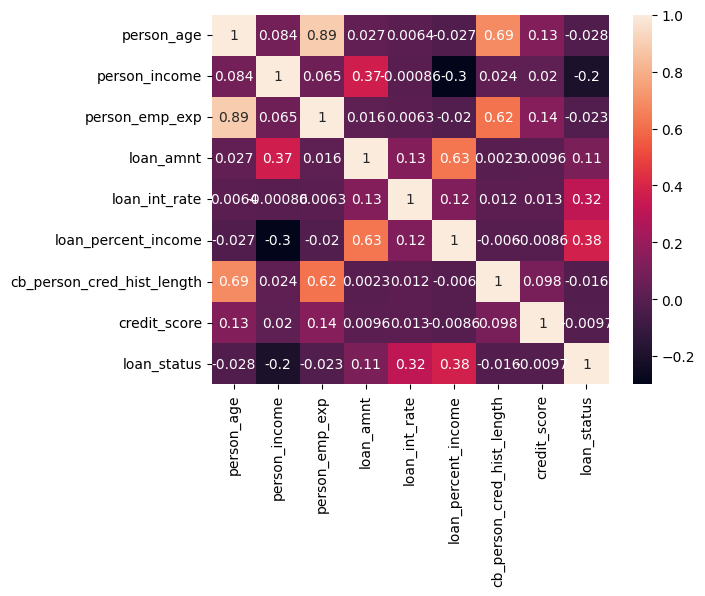

In [22]:
# correlation
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [23]:
X = df.drop(columns = ['loan_status', 'cb_person_cred_hist_length'], axis = 1)
y = df['loan_status']

In [24]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,561.0,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,504.0,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,635.0,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,675.0,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,586.0,No


In [25]:
X.shape[1]

12

In [26]:
# encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [27]:
X['person_gender'] = encoder.fit_transform(X['person_gender'])

In [28]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,561.0,No
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,504.0,Yes
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,635.0,No
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,675.0,No
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,586.0,No


In [29]:
X['person_education'].value_counts()

,count
person_education,
Bachelor,8127
High School,6849
Associate,6797
Master,4252
Doctorate,232


In [30]:
edu_imp = {
  'High School': 0,
  'Associate': 1,
  'Bachelor': 2,
  'Master': 3,
  'Doctorate': 4
}

In [31]:
X['person_education'] = X['person_education'].map(edu_imp)

In [32]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file
0,22.0,0,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,561.0,No
1,21.0,0,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,504.0,Yes
2,25.0,0,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,635.0,No
3,23.0,0,2,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,675.0,No
4,24.0,1,3,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,586.0,No


In [33]:
X['person_education'].unique()

array([3, 0, 2, 1, 4])

In [34]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [35]:
X['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,13838
MORTGAGE,10306
OWN,2020
OTHER,93


In [36]:
X = pd.get_dummies(X, columns = ['person_home_ownership'])

In [37]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,0,3,71948.0,0,35000.0,PERSONAL,16.02,0.49,561.0,No,False,False,False,True
1,21.0,0,0,12282.0,0,1000.0,EDUCATION,11.14,0.08,504.0,Yes,False,False,True,False
2,25.0,0,0,12438.0,3,5500.0,MEDICAL,12.87,0.44,635.0,No,True,False,False,False
3,23.0,0,2,79753.0,0,35000.0,MEDICAL,15.23,0.44,675.0,No,False,False,False,True
4,24.0,1,3,66135.0,1,35000.0,MEDICAL,14.27,0.53,586.0,No,False,False,False,True


In [38]:
X = pd.get_dummies(X, columns = ['loan_intent'])

In [39]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,3,71948.0,0,35000.0,16.02,0.49,561.0,No,False,False,False,True,False,False,False,False,True,False
1,21.0,0,0,12282.0,0,1000.0,11.14,0.08,504.0,Yes,False,False,True,False,False,True,False,False,False,False
2,25.0,0,0,12438.0,3,5500.0,12.87,0.44,635.0,No,True,False,False,False,False,False,False,True,False,False
3,23.0,0,2,79753.0,0,35000.0,15.23,0.44,675.0,No,False,False,False,True,False,False,False,True,False,False
4,24.0,1,3,66135.0,1,35000.0,14.27,0.53,586.0,No,False,False,False,True,False,False,False,True,False,False


In [40]:
X['previous_loan_defaults_on_file'] = encoder.fit_transform(X['previous_loan_defaults_on_file'])

In [41]:
X = X.astype(int)

In [42]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,0,3,71948,0,35000,16,0,561,0,0,0,0,1,0,0,0,0,1,0
1,21,0,0,12282,0,1000,11,0,504,1,0,0,1,0,0,1,0,0,0,0
2,25,0,0,12438,3,5500,12,0,635,0,1,0,0,0,0,0,0,1,0,0
3,23,0,2,79753,0,35000,15,0,675,0,0,0,0,1,0,0,0,1,0,0
4,24,1,3,66135,1,35000,14,0,586,0,0,0,0,1,0,0,0,1,0,0


In [43]:
df.shape

(26257, 14)

In [44]:
X.shape

(26257, 20)

In [45]:
# scale
X_scaled = scaler.fit_transform(X)

In [46]:
X_scaled

array([[-0.97892248, -1.10917657,  1.50048208, ..., -0.47616522,
         2.23183633, -0.46050696],
       [-1.24593646, -1.10917657, -1.311262  , ..., -0.47616522,
        -0.44806153, -0.46050696],
       [-0.17788051, -1.10917657, -1.311262  , ...,  2.10011137,
        -0.44806153, -0.46050696],
       ...,
       [ 0.35614746, -1.10917657,  0.56323406, ..., -0.47616522,
        -0.44806153,  2.17151985],
       [ 0.35614746, -1.10917657,  0.56323406, ..., -0.47616522,
        -0.44806153, -0.46050696],
       [ 1.6912174 ,  0.90156971,  0.56323406, ..., -0.47616522,
        -0.44806153, -0.46050696]])

In [47]:
y = y.astype(int)

In [48]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
26252,1
26253,0
26254,0
26255,1


In [49]:
type(X_scaled)

numpy.ndarray

In [50]:
y.value_counts()

,count
loan_status,
0,20405
1,5852


In [51]:
# split
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify = y, random_state = 42)

In [53]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [54]:
models = {
    'logisticRegression': LogisticRegression(max_iter = 1000),
    'knn': KNeighborsClassifier(n_neighbors = 5),
    'naiveBayes': GaussianNB(),
    'decisionTree': DecisionTreeClassifier(random_state = 42),
    'svc': SVC(kernel = 'rbf', probability = True)
}

In [55]:
results = []

In [56]:
# metrics
from sklearn.metrics import accuracy_score, f1_score

In [57]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1': round(f1, 4)
    })

In [58]:
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'F1'])

In [59]:
results_df

,Model,Accuracy,F1
0,logisticRegression,0.8855,0.7424
1,knn,0.8712,0.6960
2,naiveBayes,0.7591,0.6436
3,decisionTree,0.8925,0.7603
4,svc,0.9029,0.7720


In [60]:
results_df.sort_values(by = 'Accuracy', ascending = False)[['Model', 'Accuracy', 'F1']]

,Model,Accuracy,F1
4,svc,0.9029,0.7720
3,decisionTree,0.8925,0.7603
0,logisticRegression,0.8855,0.7424
1,knn,0.8712,0.6960
2,naiveBayes,0.7591,0.6436


In [61]:
# advance model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [62]:
randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

In [63]:
randomForest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
random_pred = randomForest.predict(X_test)

In [65]:
random_acc = accuracy_score(y_test, random_pred)
random_acc

0.8324447829398325

In [66]:
random_f1 = f1_score(y_test, random_pred)
random_f1

0.4270833333333333

In [67]:
xgbModel = xgb.XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    learning_rate = 0.1,
    random_state = 42
)

In [68]:
xgbModel.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
xgb_pred = xgbModel.predict(X_test)

In [70]:
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc

0.9126681898959127

In [71]:
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_f1

0.7987126974839087

In [72]:
rf_result = pd.DataFrame([{
    'Model': 'randomForest',
    'Accuracy': round(random_acc, 4),
    'F1': round(random_f1, 4)
}])

In [73]:
results_df = pd.concat([results_df, rf_result], ignore_index = True)

In [74]:
results_df

,Model,Accuracy,F1
0,logisticRegression,0.8855,0.7424
1,knn,0.8712,0.6960
2,naiveBayes,0.7591,0.6436
3,decisionTree,0.8925,0.7603
4,svc,0.9029,0.7720
5,randomForest,0.8324,0.4271


In [81]:
xgb_result = pd.DataFrame([{
    'Model': 'xgBoost',
    'Accuracy': round(xgb_acc, 4),
    'F1': round(xgb_f1, 4)
}])

In [82]:
results_df = pd.concat([results_df, xgb_result], ignore_index = True)

In [83]:
results_df

,Model,Accuracy,F1
0,logisticRegression,0.8855,0.7424
1,knn,0.8712,0.6960
2,naiveBayes,0.7591,0.6436
3,decisionTree,0.8925,0.7603
4,svc,0.9029,0.7720
5,randomForest,0.8324,0.4271
6,xgBoost,0.9127,0.7987


In [84]:
results_df.sort_values(by = 'Accuracy', ascending = False)[['Model', 'Accuracy', 'F1']]

,Model,Accuracy,F1
6,xgBoost,0.9127,0.7987
4,svc,0.9029,0.7720
3,decisionTree,0.8925,0.7603
0,logisticRegression,0.8855,0.7424
1,knn,0.8712,0.6960
5,randomForest,0.8324,0.4271
2,naiveBayes,0.7591,0.6436


In [85]:
# cross validatin
from sklearn.model_selection import cross_val_score

In [97]:
cv_acc_score = cross_val_score(xgbModel, X, y, cv = 5, scoring = 'accuracy')

In [101]:
cv_acc_score

array([0.91317593, 0.89242193, 0.91772996, 0.91106456, 0.89049705])

In [102]:
cv_acc_score.mean()

np.float64(0.9049778861981534)

In [103]:
cv_f1_score = cross_val_score(xgbModel, X, y, cv = 5, scoring = 'f1')

In [104]:
cv_f1_score

array([0.82528736, 0.73854697, 0.79680151, 0.81192106, 0.7064829 ])

In [105]:
cv_f1_score.mean()

np.float64(0.7758079586320326)

In [106]:
# tuning
from sklearn.model_selection import GridSearchCV

In [108]:
# hyper-parameters
xgb_param = {
    'n_estimator': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [109]:
xgb_grid = GridSearchCV(
    estimator = xgbModel,
    param_grid = xgb_param,
    scoring = 'f1',
    cv = 5
)

In [111]:
xgb_grid.fit(X_train, y_train)

,estimator,"XGBClassifier...state=42, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimator': [100, 150, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [113]:
best_params = xgb_grid.best_params_

In [114]:
best_params

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimator': 100}

In [115]:
final_xgb_model = xgb.XGBClassifier(
    n_estimators = best_params['n_estimator'],
    learning_rate = best_params['learning_rate'],
    max_depth = best_params['max_depth'],
    random_state = 42,
    use_label_encoder = False,
    eval_metric = 'logloss'
)

In [116]:
final_xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [117]:
final_pred = final_xgb_model.predict(X_test)

In [120]:
print('Final_Accuracy:', accuracy_score(y_test, final_pred))

Final_Accuracy: 0.9212998222899214


In [121]:
print('Final_F1:', f1_score(y_test, final_pred))

Final_F1: 0.8149253731343283
